In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Accumulating and Indexing a Time Series

Load Point of Sale data into a data frame

In [9]:
# Load Data

data_path = '/content/drive/My Drive/Data/POS_data.csv'
POS_dat = pd.read_csv(data_path)

POS_dat.head
POS_dat.info()
print(POS_dat)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   units   1604 non-null   float64
 1   dtdate  10153 non-null  object 
 2   date    10153 non-null  object 
 3   mon     10153 non-null  int64  
 4   yr      10153 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 396.7+ KB
        units              dtdate       date  mon    yr
0         NaN  02JAN2004:08:00:00   2-Jan-04    1  2004
1      1940.0  02JAN2004:09:00:00   2-Jan-04    1  2004
2         NaN  02JAN2004:10:00:00   2-Jan-04    1  2004
3      3147.0  02JAN2004:11:00:00   2-Jan-04    1  2004
4         NaN  02JAN2004:12:00:00   2-Jan-04    1  2004
...       ...                 ...        ...  ...   ...
10148     NaN  29DEC2006:16:00:00  29-Dec-06   12  2006
10149     NaN  29DEC2006:17:00:00  29-Dec-06   12  2006
10150     NaN  29DEC2006:18:00:00  29-Dec-06   12  2006
10151    

The date values were read into the data frame as objects. To properly handle the date, it needs to be converted to a datetime format using to_datetime.  

Convert the date value and plot the raw data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   units   1604 non-null   float64       
 1   dtdate  10153 non-null  object        
 2   date    10153 non-null  datetime64[ns]
 3   mon     10153 non-null  int64         
 4   yr      10153 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 396.7+ KB


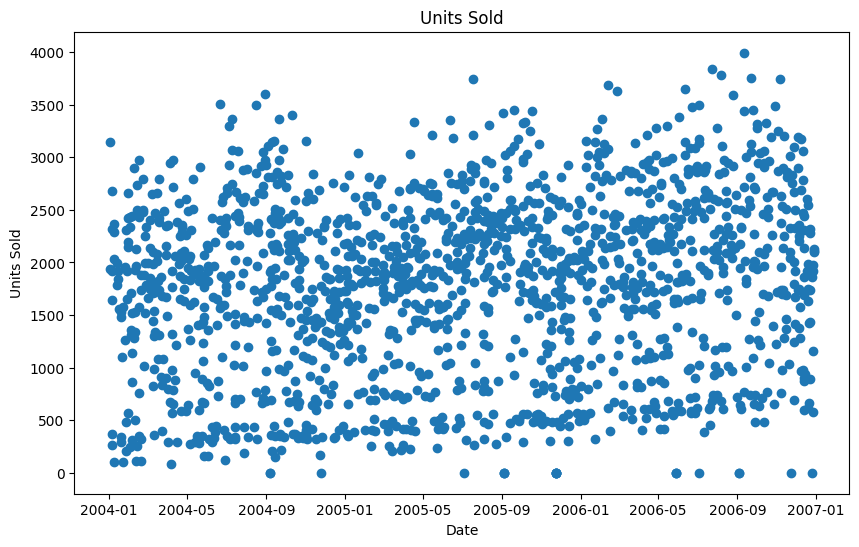

In [10]:
# Convert date column to a date class variable
POS_dat['date'] = pd.to_datetime(POS_dat['date'], format="%d-%b-%y")

POS_dat.info()

# Plot raw transactional data
plt.figure(figsize=(10, 6))
plt.scatter(POS_dat['date'], POS_dat['units'])
plt.title("Units Sold")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

Point of Sale data were collected on an hourly basis.  The store is requesting that you produce a MONTHLY forecast.  The data will need to be accumulated to a montly level in order to produce the forecast

First, drop any missing values at the hourly level.

*   First, drop any missing values at the hourly level
Next, compute the total number of units sold for each month
*   Next, compute the total number of units sold for each month (within each year)
*   Then, creating a monthly index for the time series to streamline the analysis going forward

In [11]:
# Accumulate the data to a monthly level

# Drop missing values and group by year and month
POS_clean = POS_dat.dropna()
POS_month = POS_clean.groupby(['yr', 'mon'])['units'].sum().reset_index()

print(POS_month)

# Create a monthly index for the series
POS_month['date'] = pd.to_datetime(POS_month['yr'].astype(str) + '-' + POS_month['mon'].astype(str), format="%Y-%m")
POS_ts = pd.Series(POS_month['units'].values, index=POS_month['date'])
POS_ts.index.freq = 'MS'




      yr  mon     units
0   2004    1   56392.0
1   2004    2   67539.0
2   2004    3   74179.0
3   2004    4   64487.0
4   2004    5   59831.0
5   2004    6   63307.0
6   2004    7   75686.0
7   2004    8   71213.0
8   2004    9  108364.0
9   2004   10   75827.0
10  2004   11   64584.0
11  2004   12   73883.0
12  2005    1   77678.0
13  2005    2   59612.0
14  2005    3   72775.0
15  2005    4   87209.0
16  2005    5   78497.0
17  2005    6   80838.0
18  2005    7   86890.0
19  2005    8   95887.0
20  2005    9   77283.0
21  2005   10   95623.0
22  2005   11   76608.0
23  2005   12   84623.0
24  2006    1   80727.0
25  2006    2   75889.0
26  2006    3   82199.0
27  2006    4   95301.0
28  2006    5   86293.0
29  2006    6   94229.0
30  2006    7   78498.0
31  2006    8   89776.0
32  2006    9   77024.0
33  2006   10   76604.0
34  2006   11   89900.0
35  2006   12   90453.0


Plot the monthly series

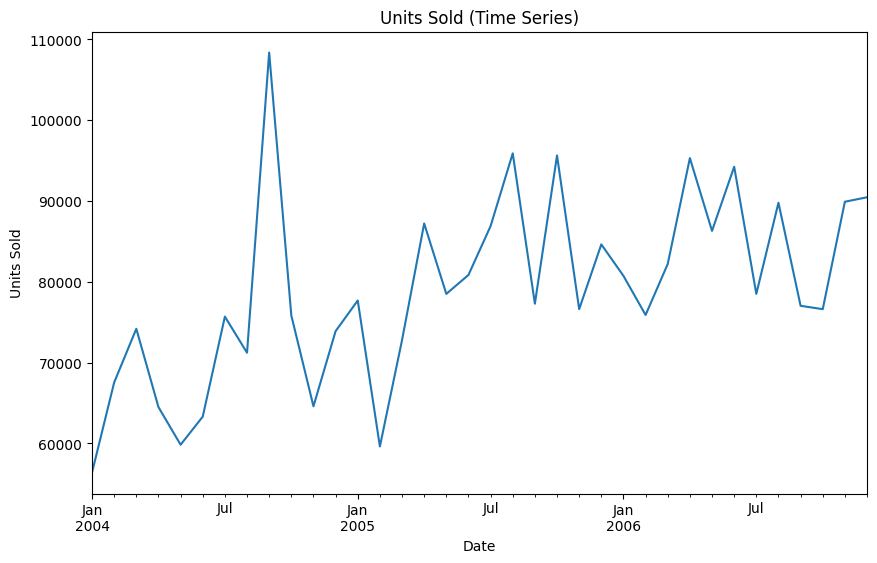

In [12]:
#Plot the monthly series
plt.figure(figsize=(10, 6))
POS_ts.plot()
plt.title("Units Sold (Time Series)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

## Handling missing values in a time series



Load the Housing Starts Data to illustrate the process

In [13]:

# Load the housing starts data

data_path2 = '/content/drive/My Drive/Data/housing_na.csv'
house_data = pd.read_csv(data_path2)

house_data.head
house_data.info()
print(house_data)

# Check for missing values
print(house_data['HOUST'].isna().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    204 non-null    object 
 1   HOUST   186 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
          DATE   HOUST
0     1/1/1990     NaN
1     2/1/1990  1437.0
2     3/1/1990  1289.0
3     4/1/1990  1248.0
4     5/1/1990  1212.0
..         ...     ...
199   8/1/2006  1650.0
200   9/1/2006  1720.0
201  10/1/2006  1491.0
202  11/1/2006     NaN
203  12/1/2006     NaN

[204 rows x 2 columns]
18


Create a series with a monthly index for the housing starts data

In [14]:
# Create time series with an index and compare missing value imputation methods
house_data['DATE'] = pd.to_datetime(house_data['DATE'])
house_ts = pd.Series(house_data['HOUST'].values, index=house_data['DATE'])
house_ts.index.freq = 'MS'

Plot the housing starts series

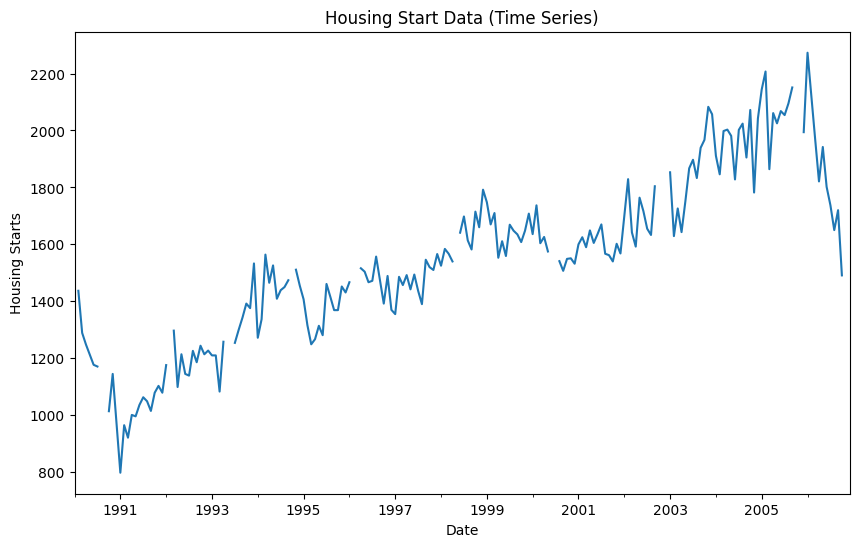

In [15]:
plt.figure(figsize=(10, 6))
house_ts.plot()
plt.title("Housing Start Data (Time Series)")
plt.xlabel("Date")
plt.ylabel("Housing Starts")
plt.show()

Impute missing values using the mean and plot the series

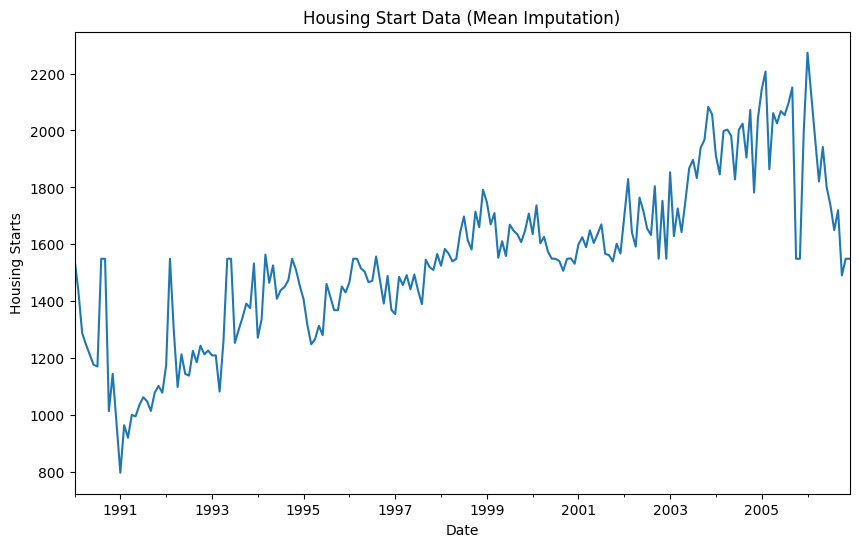

In [16]:

# Impute missing values using mean imputation
house_tsm = house_ts.fillna(house_ts.mean())

plt.figure(figsize=(10, 6))
house_tsm.plot()
plt.title("Housing Start Data (Mean Imputation)")
plt.xlabel("Date")
plt.ylabel("Housing Starts")
plt.show()



Impute missing values using linear interpolation and plot the series

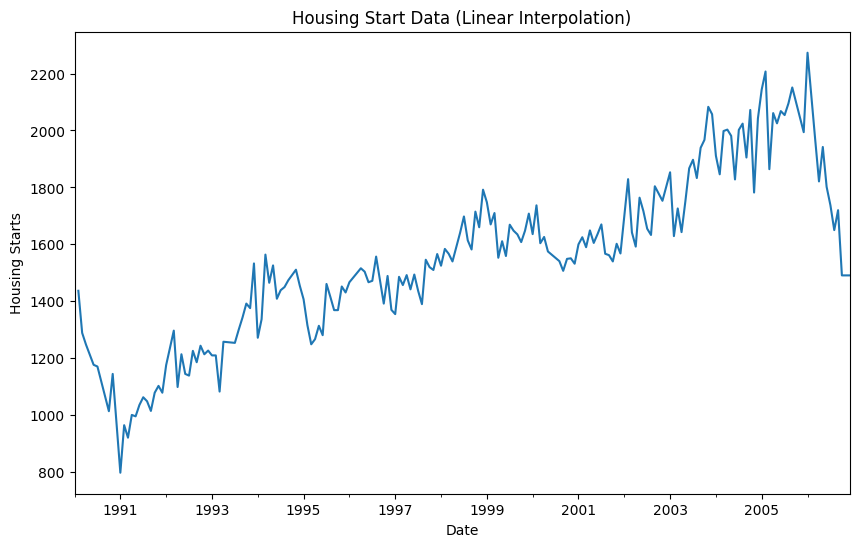

In [17]:
# Impute missing values using linear interpolation
house_tsi = house_ts.interpolate(method='linear')

plt.figure(figsize=(10, 6))
house_tsi.plot()
plt.title("Housing Start Data (Linear Interpolation)")
plt.xlabel("Date")
plt.ylabel("Housing Starts")
plt.show()